# PDF TO IMAGE

In [ ]:
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-tha
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 899 kB of archives.
After this operation, 1,087 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-tha all 1:4.00~git30-7274cfa-1.1 [899 kB]
Fetched 899 kB in 1s (1,436 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-tha.
(Reading data

In [ ]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (213 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.4_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.4) ...
Setting up poppler-utils (22.02.0-2ubuntu0.4) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip install pdf2image

# แปลงรูปภาพ PDF TO IMAGE

In [ ]:
from pdf2image import convert_from_path
import os

In [332]:
def convert_pdf_to_jpg(input_dir, output_dir, quality=95, dpi=300):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)  # Create the output directory if it doesn't exist

    num_files = len([filename for filename in os.listdir(input_dir) if filename.endswith('.pdf')])
    count = 0

    for filename in os.listdir(input_dir):
        if filename.endswith('.pdf'):
            count += 1
            pdf_path = os.path.join(input_dir, filename)  # Get the full path of the PDF file
            output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.jpg')  # Construct the output image path

            try:
                images = convert_from_path(pdf_path, dpi=dpi)
                for i, img in enumerate(images):
                    img_path = f'{output_path[:-4]}_{i}.jpg' if i > 0 else output_path  # Add index to output image path if multiple pages
                    img.save(img_path, 'JPEG', quality=quality)

            except Exception as e:
                print(f'Error converting {pdf_path}: {e}')
                continue  # Skip to the next file if conversion fails

            else:
                print(f'Successfully converted {pdf_path} to {output_path} ({count}/{num_files})')

# Change this based on your folder paths
input_dir = "/content/Invoice"
output_dir = "/content/InvoiceIMG"
convert_pdf_to_jpg(input_dir, output_dir)

Successfully converted /content/Invoice/invoice.pdf to /content/InvoiceIMG/invoice.jpg (1/1)


# DETECT TEXT FROM IMAGE

In [ ]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [ ]:
import PIL
from PIL import ImageDraw

In [333]:
import easyocr
reader = easyocr.Reader(['th','en']) # this needs to run only once to load the model into memory
image = ('/content/InvoiceIMG/invoice.jpg')
result = reader.readtext(image)

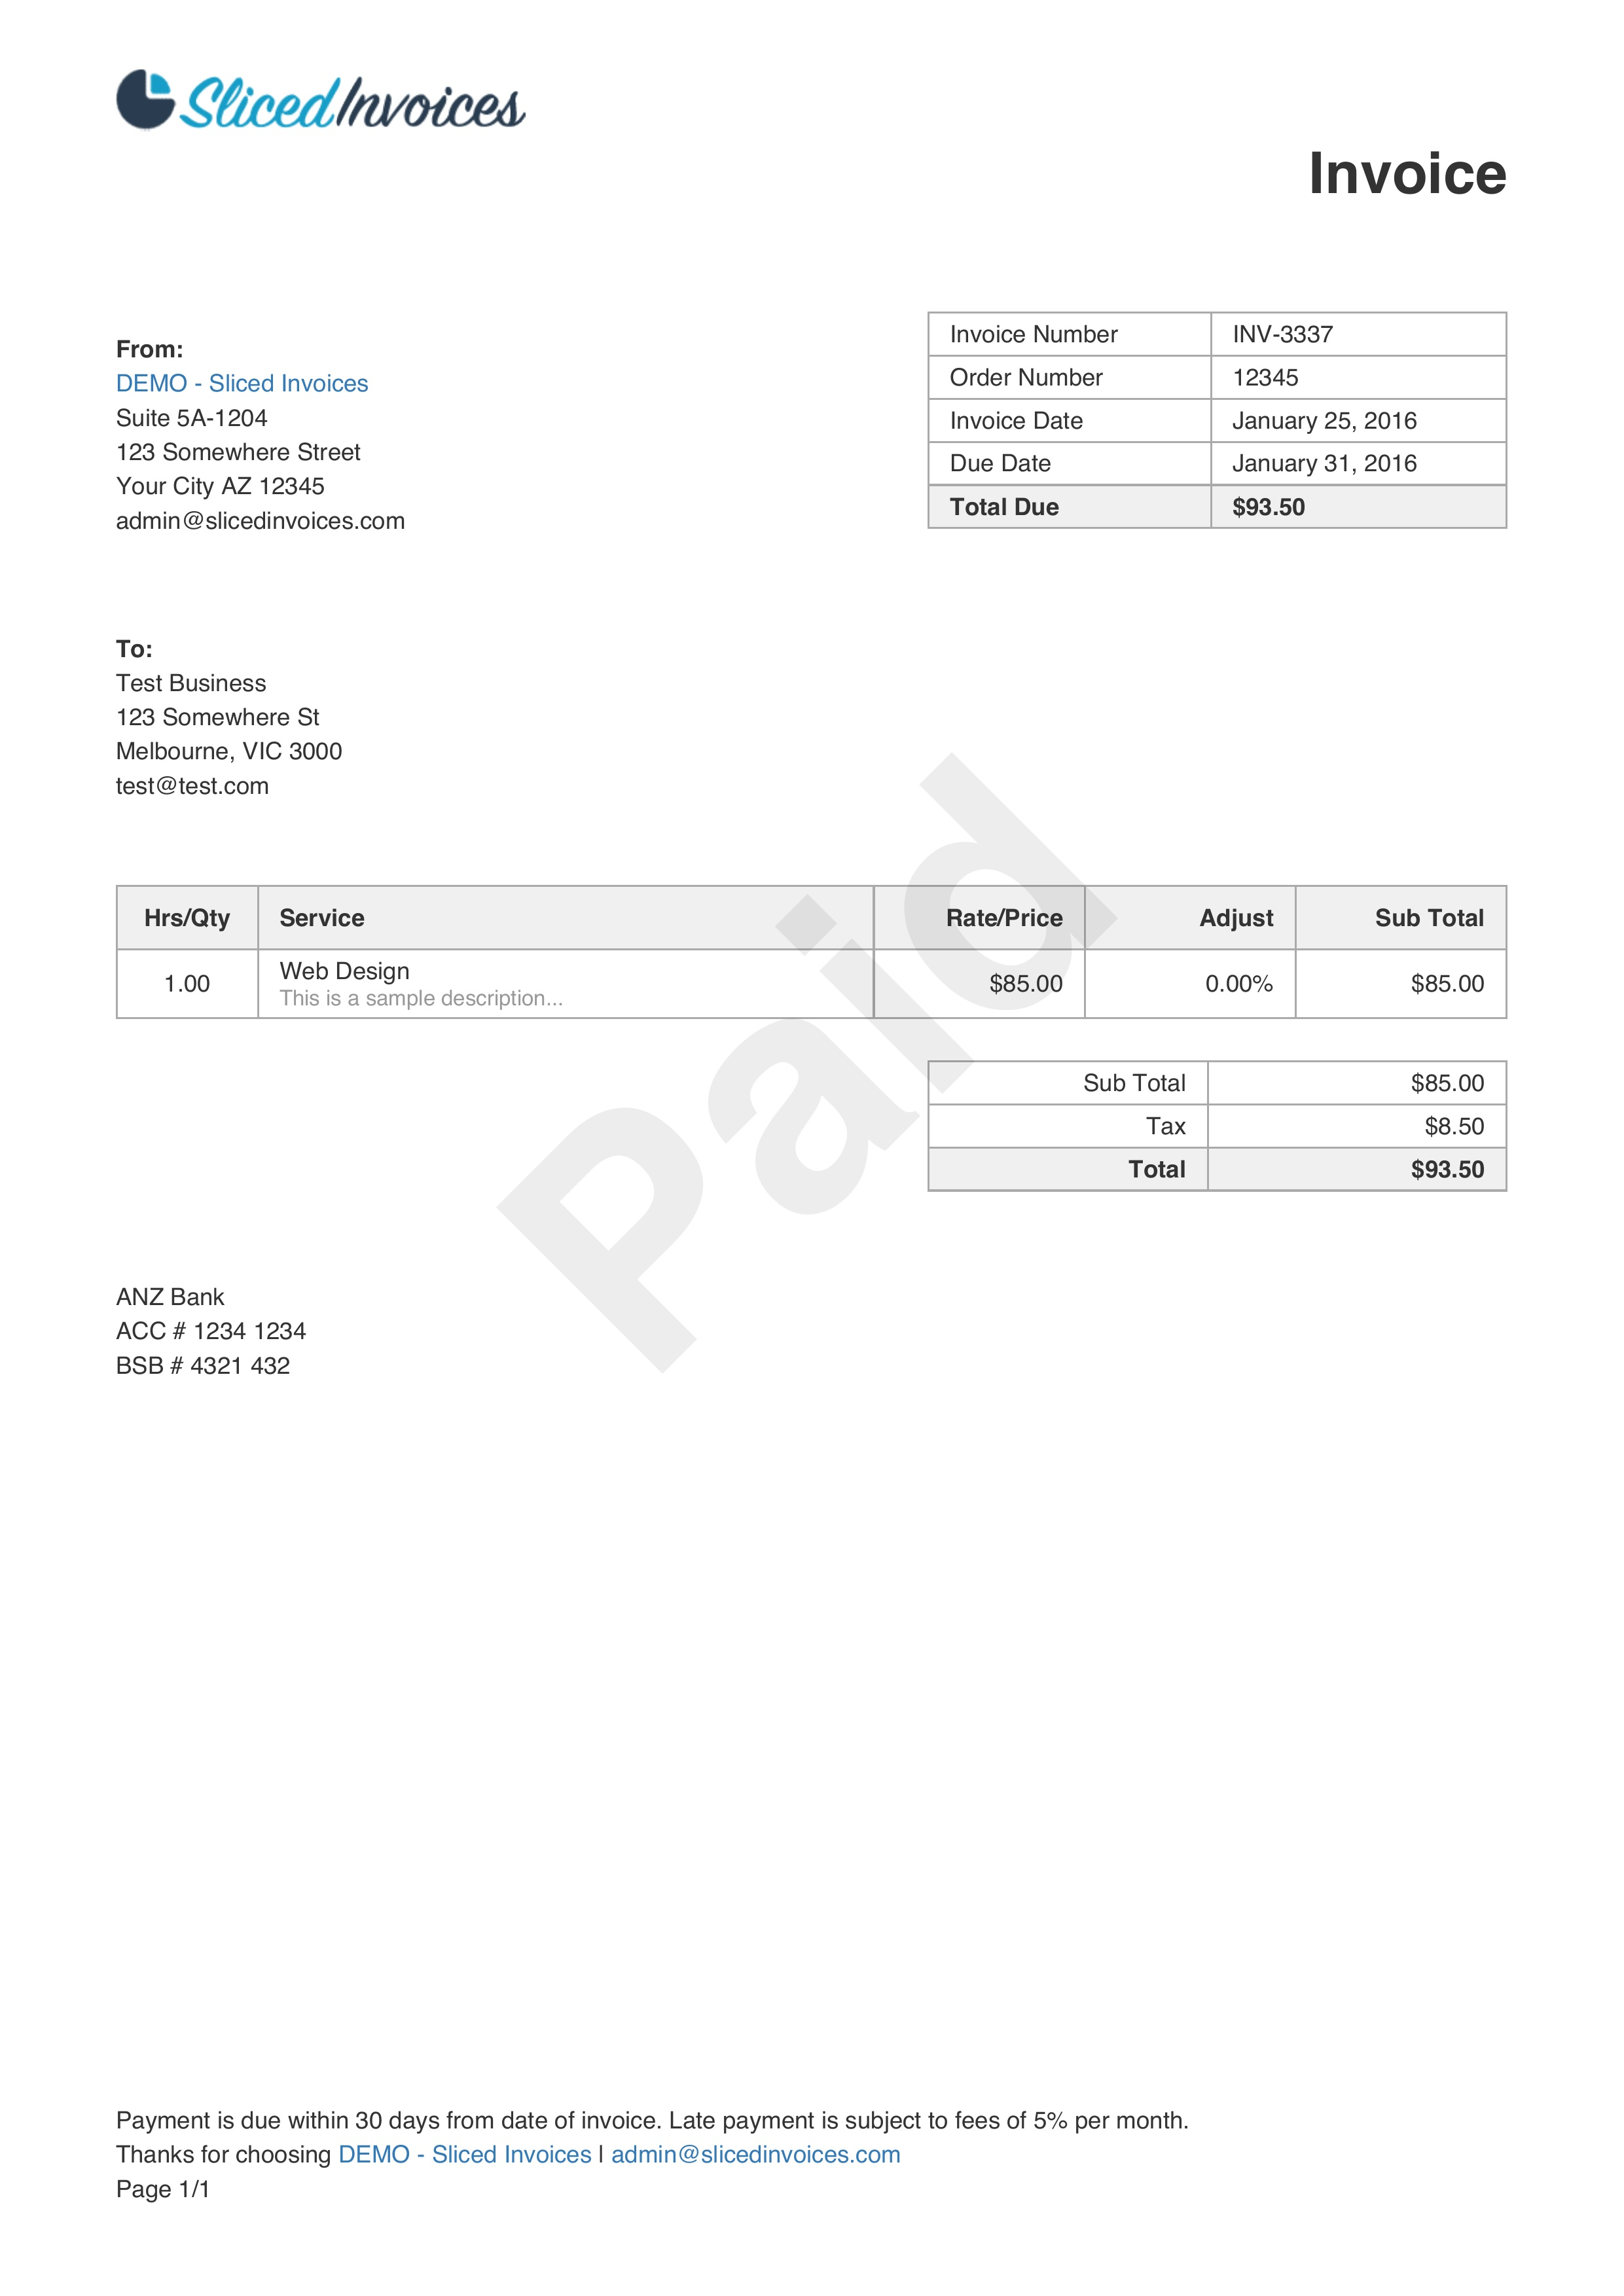

In [339]:
im = PIL.Image.open(image)
im

In [340]:
# ทำกรอบสี่เหลี่ยม
def draw_boxes(image, bounds, color='yellow', width=2):
    image_with_boxes = image.copy()
    draw = ImageDraw.Draw(image_with_boxes)
    for bound in bounds:
        p0, p1, p2, p3 = bound
        draw.polygon([*p0, *p1, *p2, *p3], outline=color, width=width)
    return image_with_boxes

In [341]:
import pandas as pd
import re

In [342]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

In [343]:
df = pd.DataFrame(result, columns=['ตำแหน่ง', 'ชื่อ','ความแม่นยำ'])
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):
    display(df[['ชื่อ','ตำแหน่ง']])

,ชื่อ,ตำแหน่ง
0,slioedlnoices,"[[270, 100], [820, 100], [820, 209], [270, 209]]"
1,invoice,"[[1993, 220], [2314, 220], [2314, 308], [1993, 308]]"
2,invoice number,"[[1446, 490], [1715, 490], [1715, 531], [1446, 531]]"
3,inv-3337,"[[1879, 490], [2042, 490], [2042, 531], [1879, 531]]"
4,from:,"[[173, 513], [286, 513], [286, 556], [173, 556]]"
5,dem0,"[[175, 564], [296, 564], [296, 605], [175, 605]]"
6,sliced invoices,"[[314, 564], [570, 564], [570, 608], [314, 608]]"
7,order number,"[[1446, 556], [1691, 556], [1691, 597], [1446, 597]]"
8,12345,"[[1879, 556], [1989, 556], [1989, 597], [1879, 597]]"
9,suite 5a-1204,"[[172, 619], [414, 619], [414, 660], [172, 660]]"


In [357]:
# [[1500, 1094] = บนซ้าย , [1570, 1094] บนขวา, [1570, 1124] ล่างขวา, [1500, 1124]] ล่างซ้าย,
bounds = [[[246, 1482], [326, 1482], [326, 1521], [246, 1521]],
          [[423, 1462], [634, 1462], [634, 1511], [423, 1511]],
          [[1507, 1482], [1630, 1482], [1630, 1524], [1507, 1524]],
          [[1835, 1482], [1951, 1482], [1951, 1524], [1835, 1524]],
          [[2151, 1633], [2274, 1633], [2274, 1677], [2151, 1677]],
          [[2173, 1698], [2274, 1698], [2274, 1743], [2173, 1743]],
          [[2151, 1764], [2274, 1764], [2274, 1809], [2151, 1809]],
          ]

# เพิ่มขนาดช่อง
def increase_bounding_boxes_auto(bounds, increase):
    increased_bounds = []
    for box in bounds:
        min_x = min(point[0] for point in box)
        max_x = max(point[0] for point in box)
        min_y = min(point[1] for point in box)
        max_y = max(point[1] for point in box)

        new_box = [
            [min_x - increase, min_y - increase],
            [max_x + increase, min_y - increase],
            [max_x + increase, max_y + increase],
            [min_x - increase, max_y + increase]
        ]

        increased_bounds.append(new_box)

    return increased_bounds

# Define the increase amount for each bounding box
increase_amount = 5  # ปรับขนาดช่องสี่เหลี่ยม

# Increase the size of bounding boxes automatically
increased_bounds = increase_bounding_boxes_auto(bounds, increase_amount)
increased_bounds

[[[241, 1477], [331, 1477], [331, 1526], [241, 1526]],
 [[418, 1457], [639, 1457], [639, 1516], [418, 1516]],
 [[1502, 1477], [1635, 1477], [1635, 1529], [1502, 1529]],
 [[1830, 1477], [1956, 1477], [1956, 1529], [1830, 1529]],
 [[2146, 1628], [2279, 1628], [2279, 1682], [2146, 1682]],
 [[2168, 1693], [2279, 1693], [2279, 1748], [2168, 1748]],
 [[2146, 1759], [2279, 1759], [2279, 1814], [2146, 1814]]]

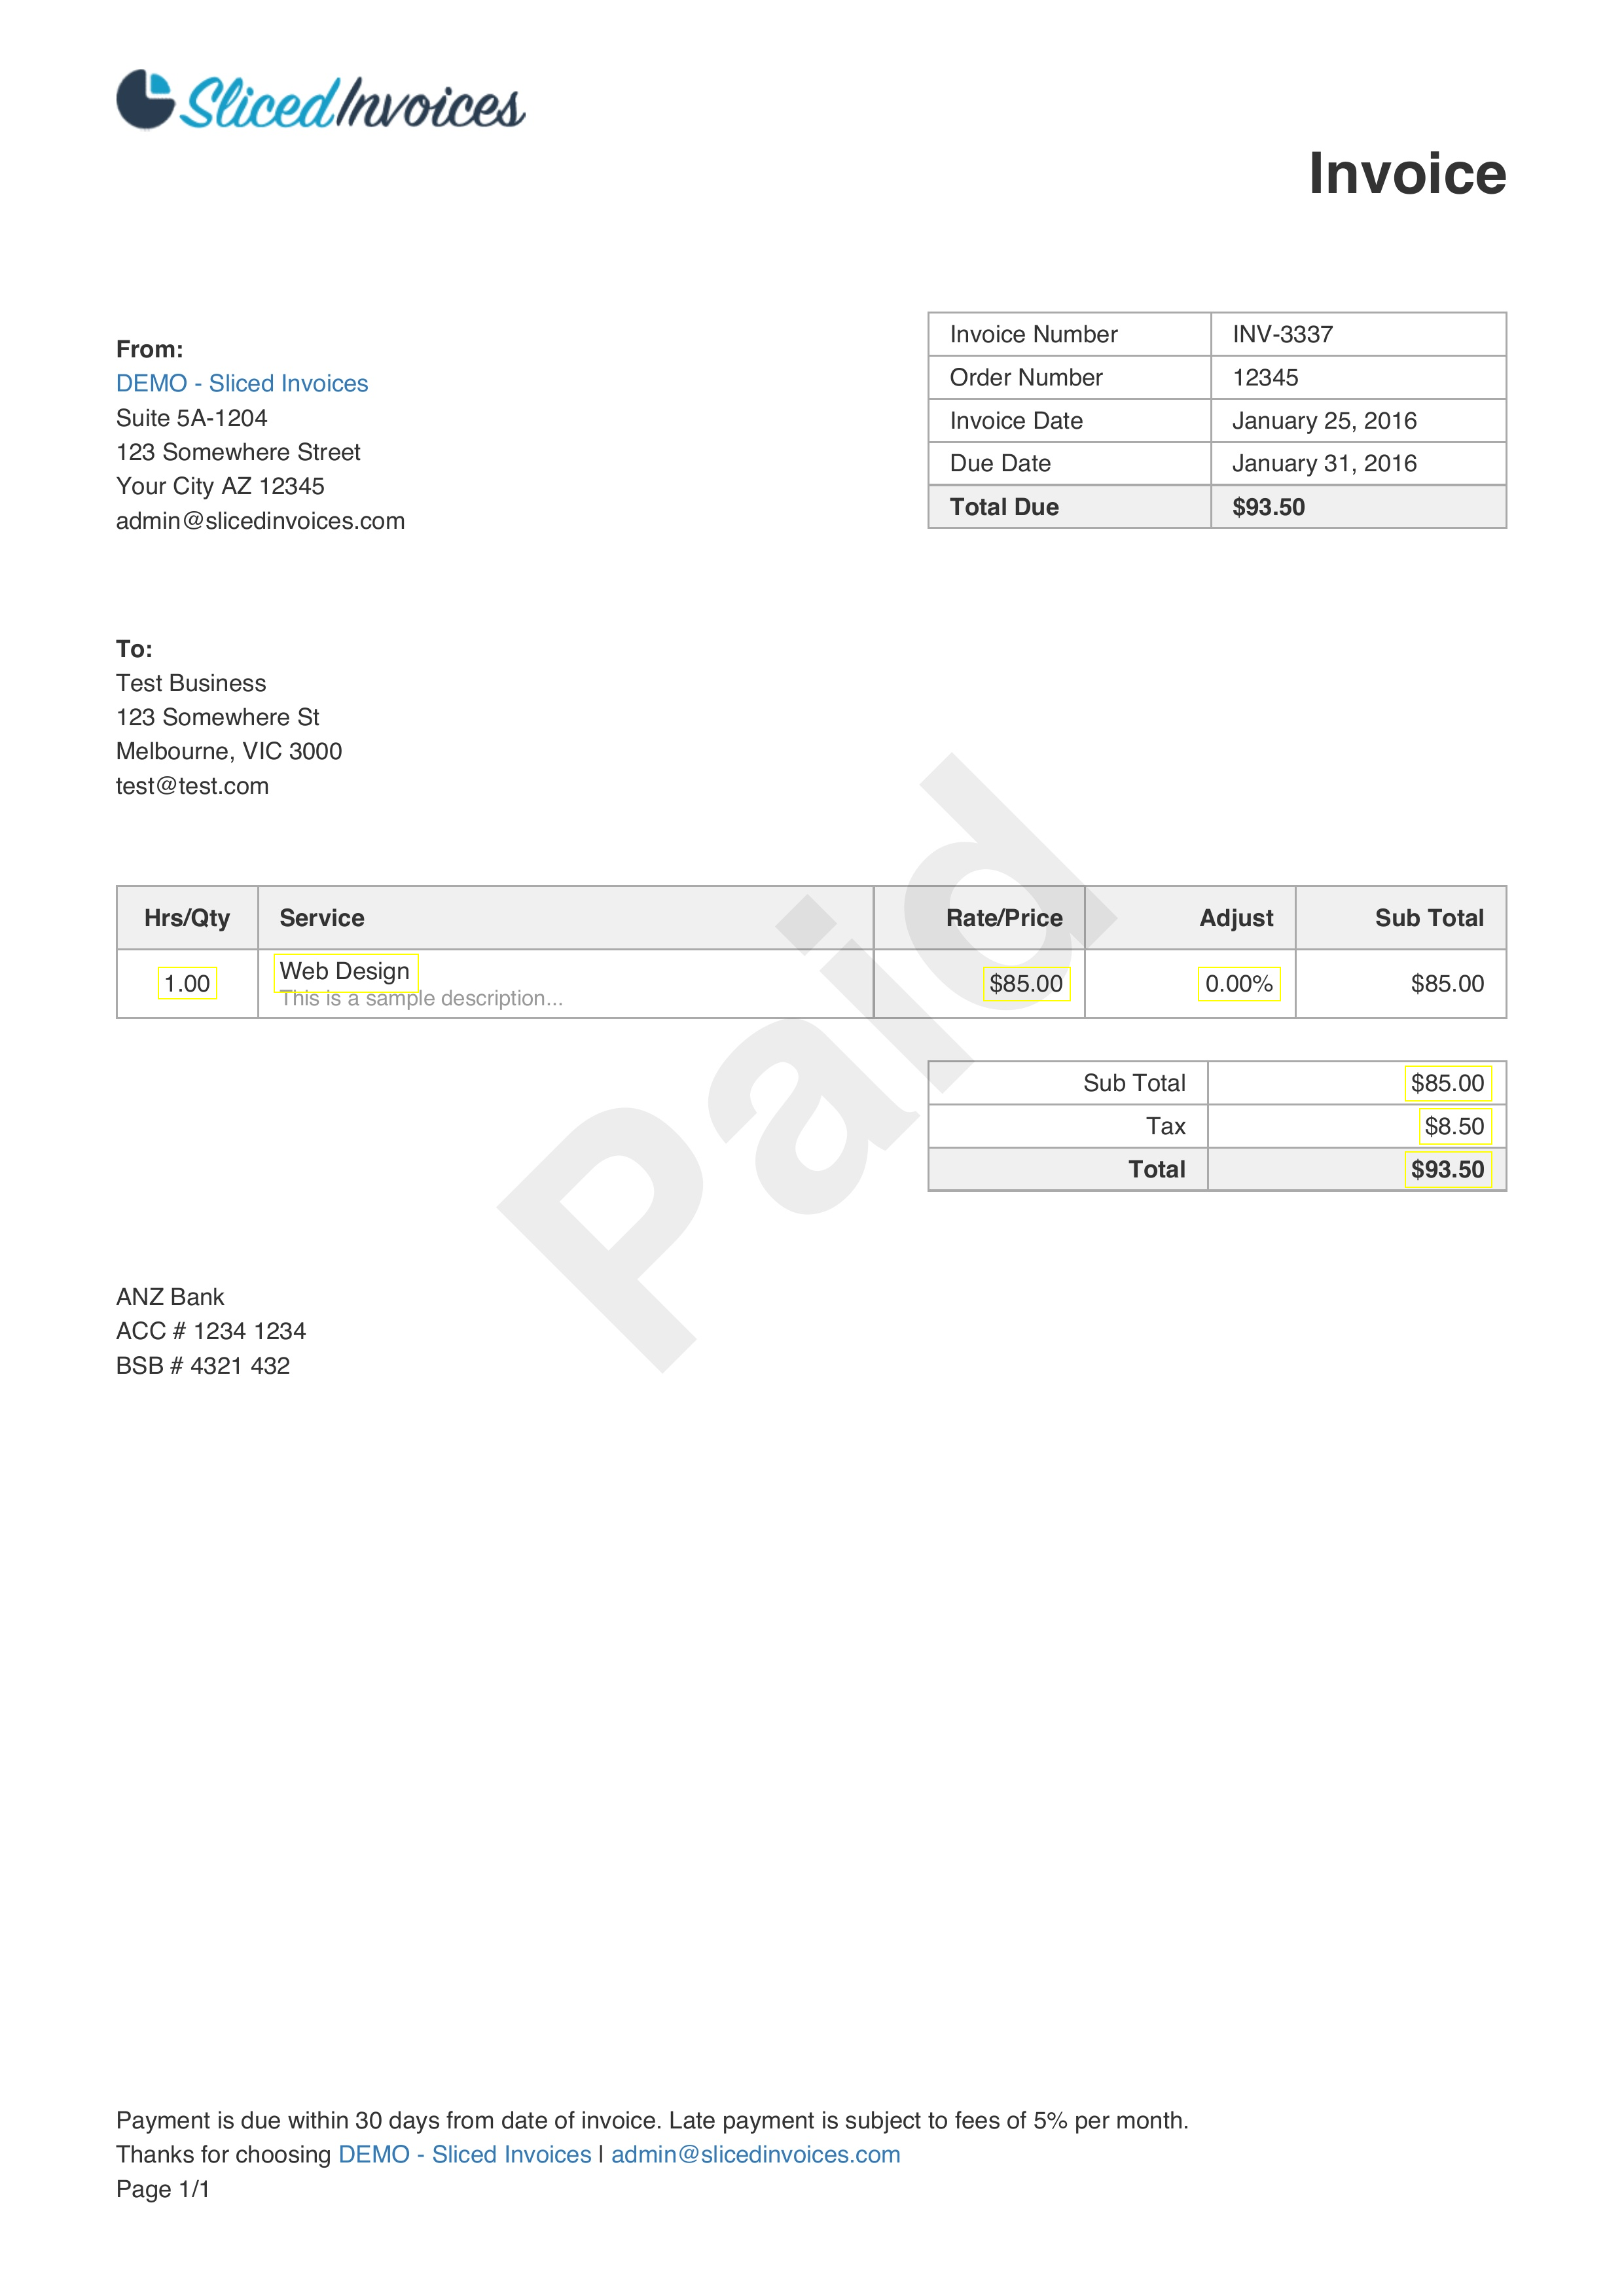

In [358]:
result_image = draw_boxes(im, increased_bounds)
result_image

# Invoice ตำแหน่งที่ 2

In [ ]:
reader = easyocr.Reader(['th','en']) # this needs to run only once to load the model into memory
image2 = ('ใส่รูปภาพ')
result2 = reader.readtext(image2)

In [ ]:
# show an image
im2 = PIL.Image.open(image2)
im2

In [ ]:
df2 = pd.DataFrame(result2, columns=['ตำแหน่ง', 'ชื่อ','ความแม่นยำ'])
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):
    display(df2[['ชื่อ','ตำแหน่ง']])

In [ ]:
# [[1500, 1094] = บนซ้าย , [1570, 1094] บนขวา, [1570, 1124] ล่างขวา, [1500, 1124]] ล่างซ้าย,
bounds2 = [[[117, 182], [378, 182], [378, 247], [117, 247]],
          [[499, 562], [1085, 562], [1085, 624], [499, 624]],
          [[1811, 408], [2165, 408], [2165, 452], [1811, 452]],
          [[1814, 482], [2031, 482], [2031, 526], [1814, 526]],
          [[2250, 1576], [2357, 1576], [2357, 1617], [2250, 1617]],
          [[2272, 1641], [2357, 1641], [2357, 1680], [2272, 1680]],
          [[2250, 1707], [2357, 1707], [2357, 1752], [2250, 1752]]
          ]

# Define the increase amount for each bounding box
increase_amount = 5  # ปรับขนาดช่องสี่เหลี่ยม

# Increase the size of bounding boxes automatically
increased_bounds2 = increase_bounding_boxes_auto(bounds2, increase_amount)
increased_bounds2

In [ ]:
result_image2 = draw_boxes(im2, increased_bounds2)
result_image2

# Invoice ตำแหน่งที่ 3

In [ ]:
reader = easyocr.Reader(['th','en']) # this needs to run only once to load the model into memory
image3 = ('ใส่รูปภาพ')
result3 = reader.readtext(image3)

In [ ]:
# show an image
im3 = PIL.Image.open(image3)
im3

In [ ]:
df3 = pd.DataFrame(result3, columns=['ตำแหน่ง', 'ชื่อ','ความแม่นยำ'])
with pd.option_context('display.max_colwidth', None,
                       'display.max_columns', None,
                       'display.max_rows', None):
    display(df3[['ชื่อ','ตำแหน่ง']])

In [ ]:
# [[1500, 1094] = บนซ้าย , [1570, 1094] บนขวา, [1570, 1124] ล่างขวา, [1500, 1124]] ล่างซ้าย,
bounds3 = [[[117, 203], [378, 203], [378, 269], [117, 269]],
          [[497, 585], [1084, 585], [1084, 642], [497, 642]],
          [[1814, 427], [2168, 427], [2168, 471], [1814, 471]],
          [[1811, 504], [2031, 504], [2031, 548], [1811, 548]],
          [[2250, 1576], [2357, 1576], [2357, 1617], [2250, 1617]],
          [[2250, 1641], [2357, 1641], [2357, 1683], [2250, 1683]],
          [[2250, 1707], [2352, 1707], [2352, 1752], [2250, 1752]]
          ]

# Define the increase amount for each bounding box
increase_amount = 15  # ปรับขนาดช่องสี่เหลี่ยม

# Increase the size of bounding boxes automatically
increased_bounds3 = increase_bounding_boxes_auto(bounds3, increase_amount)
increased_bounds3

In [ ]:
result_image3 = draw_boxes(im2, increased_bounds3)
result_image3

# ดึงข้อมูลออกจากภาพตามตำแหน่งที่กำหนด

In [ ]:
!sudo apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (5,844 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
!pip install pytesseract

In [359]:
import pytesseract

def extract_text_from_boxes(image, bounds):
    extracted_texts = []
    for bound in bounds:
        # Extract the coordinates of the bounding box
        x_coords, y_coords = zip(*bound)

        # Calculate the bounding box boundaries
        left = min(x_coords)
        upper = min(y_coords)
        right = max(x_coords)
        lower = max(y_coords)

        # Ensure the bounding box is within the image boundaries
        left = max(0, left)
        upper = max(0, upper)
        right = min(image.width, right)
        lower = min(image.height, lower)

        # Extract the region defined by the bounding box
        bbox_image = image.crop((left, upper, right, lower))

        # Perform OCR on the region
        extracted_text = pytesseract.image_to_string(bbox_image, lang='tha+eng')

        # Append the extracted text to the list
        extracted_texts.append(extracted_text.strip())

    return extracted_texts

In [360]:
# Extract text from bounding boxes
extracted_texts = extract_text_from_boxes(im, increased_bounds)

# Print the extracted texts
for i, text in enumerate(extracted_texts):
    print(f"Text from bounding box {i+1}: {text}")

Text from bounding box 1: 1.00
Text from bounding box 2: Web Design
Text from bounding box 3: $85.00
Text from bounding box 4: 0.00%
Text from bounding box 5: $85.00
Text from bounding box 6: $8.50
Text from bounding box 7: $93.50


In [361]:
df1 = pd.DataFrame([extracted_texts], columns=['Hrs/Qty','Service','Rate/Price','Adjust','Sub Total','Tax','Total'])
df1

,Hrs/Qty,Service,Rate/Price,Adjust,Sub Total,Tax,Total
0,1.00,Web Design,$85.00,0.00%,$85.00,$8.50,$93.50


# 1 Invoice

In [362]:
import os
from PIL import Image

# Function to extract text from bounding boxes
def extract_text_from_boxes(image, bounds):
    extracted_texts = []
    for bound in bounds:
        # Extract the coordinates of the bounding box
        x_coords, y_coords = zip(*bound)

        # Calculate the bounding box boundaries
        left = min(x_coords)
        upper = min(y_coords)
        right = max(x_coords)
        lower = max(y_coords)

        # Ensure the bounding box is within the image boundaries
        left = max(0, left)
        upper = max(0, upper)
        right = min(image.width, right)
        lower = min(image.height, lower)

        # Extract the region defined by the bounding box
        bbox_image = image.crop((left, upper, right, lower))

        # Perform OCR on the region
        extracted_text = pytesseract.image_to_string(bbox_image, lang='tha+eng')

        # Append the extracted text to the list
        extracted_texts.append(extracted_text.strip())

    return extracted_texts

# Folder containing images
folder_path = '/content/InvoiceIMG'

# List to store extracted texts from all images
all_extracted_texts = []

# Loop through images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust extensions as needed
        # Load the image
        image_path = os.path.join(folder_path, filename)
        im = Image.open(image_path)

        # Bounding box coordinates (assuming you have them for each image)
        bounds = bounds

        # Extract text from bounding boxes
        extracted_texts = extract_text_from_boxes(im, bounds)

        # Append extracted texts to the list
        all_extracted_texts.append(extracted_texts)

In [365]:
# Column names for the DataFrame
column_names = ['Hrs/Qty','Service','Rate/Price','Adjust','Sub Total','Tax','Total']  #ใส่ชื่อหัวข้อคอลัมน์

# Create a DataFrame from the extracted texts with specified column names
show_result = pd.DataFrame(all_extracted_texts, columns=column_names)

''' สำหรับเรียงลำดับ
# Display the DataFrame
gk = show_result.groupby('Code')
gk.first()
'''

show_result

,Hrs/Qty,Service,Rate/Price,Adjust,Sub Total,Tax,Total
0,1.00,Web Design,,0.00%,$85.00,$8.50,$93.50


# 2 Invoice ที่แตกต่างกัน

In [ ]:
def extract_text_from_boxes(image, bounds1, bounds2):
    extracted_texts = []

    def extract_text_from_bounding_box(image, bounding_box):
        # สกัดพิกเซลของ bounding box
        x_coords, y_coords = zip(*bounding_box)

        # คำนวณขอบเขตของ bounding box
        left = min(x_coords)
        upper = min(y_coords)
        right = max(x_coords)
        lower = max(y_coords)

        # ตรวจสอบว่า bounding box อยู่ในขอบเขตของภาพหรือไม่
        left = max(0, left)
        upper = max(0, upper)
        right = min(image.width, right)
        lower = min(image.height, lower)

        # สกัดส่วนที่กำหนดโดย bounding box
        bbox_image = image.crop((left, upper, right, lower))

        # ดำเนินการ OCR บนส่วนนั้น
        extracted_text = pytesseract.image_to_string(bbox_image, lang='tha+eng')

        return extracted_text.strip()

    # วนลูปผ่าน bounds1
    for bounding_box in bounds1:
        extracted_text = extract_text_from_bounding_box(image, bounding_box)
        if extracted_text:
            extracted_texts.append(extracted_text)
        else:
            # หากไม่พบข้อความ ลองใช้ bounds2 แทน
            for bounding_box_2 in bounds2:
                extracted_text_2 = extract_text_from_bounding_box(image, bounding_box_2)
                if extracted_text_2:
                    extracted_texts.append(extracted_text_2)
                    break
                else:
                    extracted_texts.append(None)  # หากไม่พบข้อความในทั้งสาม bounds ให้ใส่ None
    return extracted_texts

# โฟลเดอร์ที่มีรูปภาพ
folder_path = 'ใส่โฟลเดอร์ที่อยู่ภาพที่ต้องการตรวจสอบ'
all_extracted_texts = []

# วนลูปผ่านไฟล์ภาพในโฟลเดอร์
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        im = Image.open(image_path)
        extracted_texts = extract_text_from_boxes(im, increased_bounds, increased_bounds2)
        all_extracted_texts.append(extracted_texts)

In [ ]:
''' ใช้สำหรับต้องการแค่ตัวเลขในค่าช่องนั้น
# Function to extract only numbers from a string
def extract_numbers(text):
    numbers = re.findall(r'\d+\.*\d*', text)  # Regular expression to find numbers
    if numbers:
        return numbers[0]  # Return the first number found
    else:
        return None  # Return None if no numbers found
'''

# Column names for the DataFrame
column_names = ['Name', 'Tax', 'Code', 'Date', 'Before', 'Vat', 'After']  # ใส่ชื่อหัวข้อคอลัมน์

# Create a DataFrame from the extracted texts with specified column names
show_result2 = pd.DataFrame(all_extracted_texts, columns=column_names)

# Display the DataFrame
gk2 = show_result2.groupby('Code')
gk2.first()

# 3 Invoice ที่แตกต่างกัน

In [ ]:
def extract_text_from_boxes(image, bounds1, bounds2, bounds3):
    extracted_texts = []

    def extract_text_from_bounding_box(image, bounding_box):
        # สกัดพิกเซลของ bounding box
        x_coords, y_coords = zip(*bounding_box)

        # คำนวณขอบเขตของ bounding box
        left = min(x_coords)
        upper = min(y_coords)
        right = max(x_coords)
        lower = max(y_coords)

        # ตรวจสอบว่า bounding box อยู่ในขอบเขตของภาพหรือไม่
        left = max(0, left)
        upper = max(0, upper)
        right = min(image.width, right)
        lower = min(image.height, lower)

        # สกัดส่วนที่กำหนดโดย bounding box
        bbox_image = image.crop((left, upper, right, lower))

        # ดำเนินการ OCR บนส่วนนั้น
        extracted_text = pytesseract.image_to_string(bbox_image, lang='tha+eng')

        return extracted_text.strip()

    # วนลูปผ่าน bounds1
    for bounding_box in bounds1:
        extracted_text = extract_text_from_bounding_box(image, bounding_box)
        if extracted_text:
            extracted_texts.append(extracted_text)
        else:
            # หากไม่พบข้อความ ลองใช้ bounds2 แทน
            for bounding_box_2 in bounds2:
                extracted_text_2 = extract_text_from_bounding_box(image, bounding_box_2)
                if extracted_text_2:
                    extracted_texts.append(extracted_text_2)
                    break
            else:
                # หากไม่พบข้อความใน bounds1 และ bounds2 ใช้ bounds3 แทน
                for bounding_box_3 in bounds3:
                    extracted_text_3 = extract_text_from_bounding_box(image, bounding_box_3)
                    if extracted_text_3:
                        extracted_texts.append(extracted_text_3)
                        break
                else:
                    extracted_texts.append(None)  # หากไม่พบข้อความในทั้งสาม bounds ให้ใส่ None

    return extracted_texts

# โฟลเดอร์ที่มีรูปภาพ
folder_path = 'ใส่โฟลเดอร์ที่อยู่ภาพที่ต้องการตรวจสอบ'
all_extracted_texts = []

# วนลูปผ่านไฟล์ภาพในโฟลเดอร์
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(folder_path, filename)
        im = Image.open(image_path)
        extracted_texts = extract_text_from_boxes(im, increased_bounds, increased_bounds2, increased_bounds3)
        all_extracted_texts.append(extracted_texts)

In [ ]:
# Column names for the DataFrame
column_names = ['Name', 'Tax', 'Code', 'Date', 'Before', 'Vat', 'After']  # ใส่ชื่อหัวข้อคอลัมน์

# Create a DataFrame from the extracted texts with specified column names
show_result3 = pd.DataFrame(all_extracted_texts, columns=column_names)

# Display the DataFrame
gk3 = show_result3.groupby('Code')
gk3.first()